In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
import sklearn
print(sklearn.__version__)

1.5.2


In [ ]:
pip install --upgrade scikit-learn

In [ ]:
# Step 1: Load dataset
# Ensure 'articles.csv' has columns: 'article_id', 'Title', 'content'
articles = pd.read_csv('/content/IMDB_Dataset.csv')

In [ ]:
# Validate required columns
required_columns = ['Class Index', 'Title', 'Description']
if not all(col in articles.columns for col in required_columns):
    raise ValueError(f"Dataset must contain columns: {required_columns}")

In [ ]:
# Step 2: TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(articles['Description'])

In [ ]:
# Step 3:Appying K-Means Clustering
num_clusters = 3  # Use 3 clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
articles['kmeans_cluster'] = kmeans.fit_predict(tfidf_matrix)

In [ ]:
# Step 5: Create a Recommendation Function
def recommend_articles(user_history, articles_df, tfidf_matrix, top_n=5):
    user_tfidf = tfidf_matrix[articles_df['Class Index'].isin(user_history)]
    user_profile = np.asarray(user_tfidf.mean(axis=0)).reshape(-1)
    similarities = cosine_similarity(user_profile.reshape(1, -1), tfidf_matrix).flatten()
    recommendations = articles_df[~articles_df['Class Index'].isin(user_history)].copy()
    recommendations['similarity'] = similarities[~articles_df['Class Index'].isin(user_history)]
    return recommendations.sort_values(by='similarity', ascending=False).head(top_n)


In [ ]:
# Example user history (list of article IDs the user has read)
user_history = [1, 5, 20]


In [ ]:
# Step 5: Get recommendations
recommended_articles = recommend_articles(user_history, articles, tfidf_matrix)

In [ ]:
# Display the recommended history
user_history = [1, 5, 20]
recommended_articles = recommend_articles(user_history, articles, tfidf_matrix)
print(recommended_articles[['Title', 'similarity']])

                                                   Title  similarity
83863                       Bush Election Causes Suicide    0.311795
177                                Mission Accomplished!    0.305824
65906             New oldies approach a boon for WCBS-FM    0.294440
83693   #39; #39;Strategic partnership #39; #39; to b...    0.292226
82197   Programs: 'Larry' Series Is Still Behaving Badly    0.285962


In [ ]:
# Step 6: Visualization (PCA + Scatter Plot)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

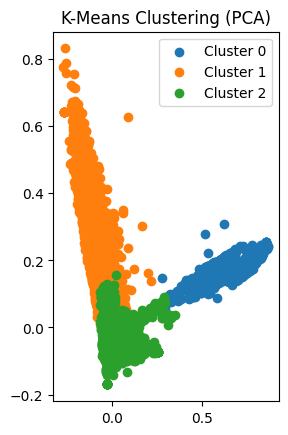

In [ ]:
# Plot K-Means clusters
plt.subplot(1, 2, 1)
for cluster in range(num_clusters):
    cluster_points = reduced_features[articles['kmeans_cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.title('K-Means Clustering (PCA)')
plt.legend()

KeyError: 'agglomerative_cluster'

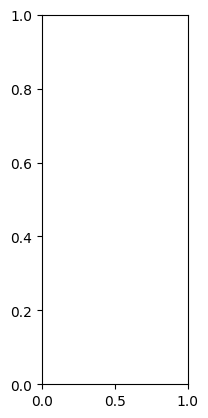

In [ ]:
# Plot Agglomerative clusters
plt.subplot(1, 3, 2)
for cluster in range(num_clusters):
    cluster_points = reduced_features[articles['agglomerative_cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.title('Agglomerative Clustering (PCA)')
plt.legend()

